In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import text
import numpy as np

In [16]:
from astropy.coordinates import SkyCoord
from hips import WCSGeometry
from hips import make_sky_image, HipsPainter

geometry = WCSGeometry.create(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=2000, height=1000, fov="3 deg",
     coordsys='galactic', projection='AIT',
)


In [3]:
hips_survey = 'CDS/P/DSS2/red'

In [4]:
precise_painter = HipsPainter(geometry, hips_survey, tile_format='fits', precise=True)


In [5]:
precise_painter.run()

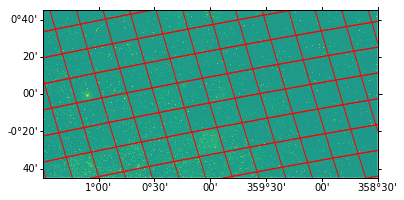

In [6]:
precise_painter.plot_mpl_hips_tile_grid()

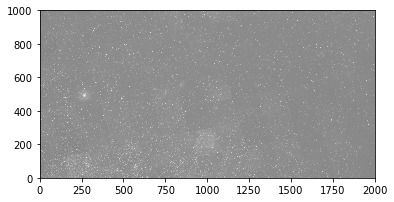

In [7]:
plt.imshow(precise_painter.image, cmap='gray', origin='lower',)


In [10]:
simple_painter = HipsPainter(geometry, hips_survey, tile_format='fits', precise=False)
simple_painter.run()


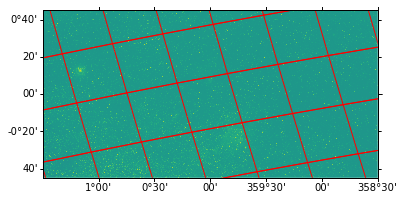

In [11]:
simple_painter.plot_mpl_hips_tile_grid()

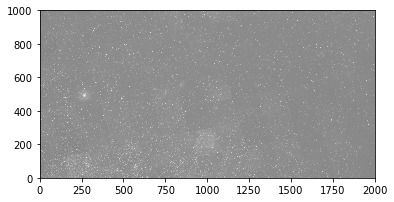

In [12]:
plt.imshow(precise_painter.image, cmap='gray', origin='lower',)


### Using the same example as: http://cds.unistra.fr/~boch/AL/test-reduce-deformations2.html

In [17]:
# geometry = WCSGeometry.create(
#      skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
#      width=2000, height=1000, fov="13 deg",
#      coordsys='icrs', projection='AIT',
# )


geometry = WCSGeometry.create(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=2000, height=1000, fov="12.98 deg",
     coordsys='galactic', projection='AIT',
)



In [18]:
hips_survey = 'CDS/P/DSS2/color'
precise_painter = HipsPainter(geometry, hips_survey, tile_format='jpg', precise=True)

In [19]:
precise_painter.run()

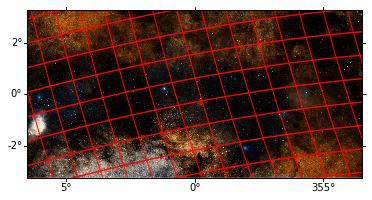

In [20]:
text(800, 800,'matplotlib', fontsize=120, horizontalalignment='center', verticalalignment='center')
precise_painter.plot_mpl_hips_tile_grid()

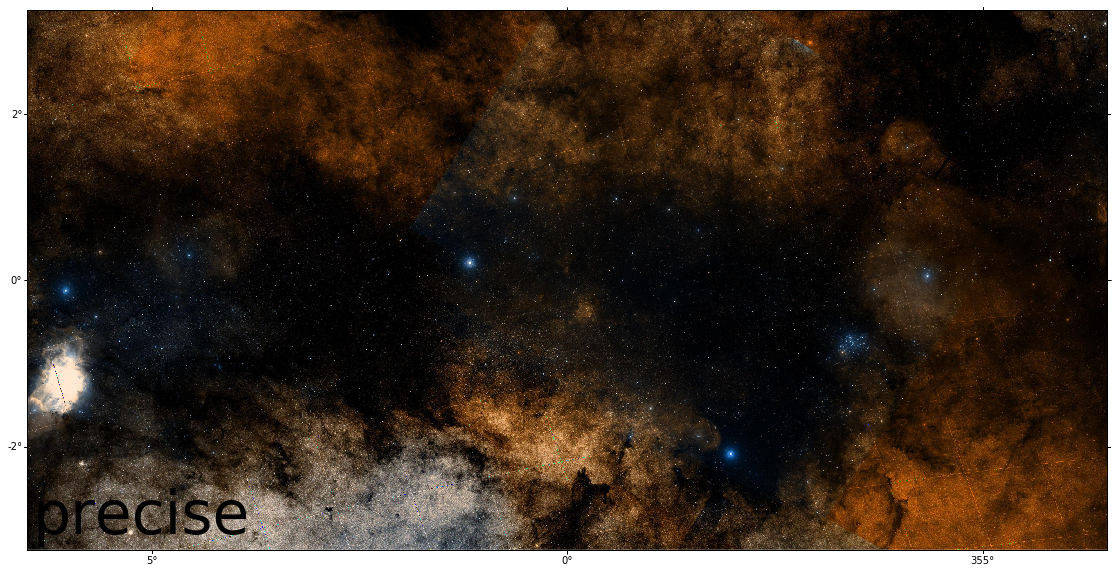

In [33]:
from astropy.visualization.wcsaxes import WCSAxes

fig = plt.figure(figsize=(15, 15))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=geometry.wcs)
fig.add_axes(ax)
text(10, 30,'precise', fontsize=60)
# Coordinates copies from: view-source:http://cds.unistra.fr/~boch/AL/test-reduce-deformations2.html
x_coords = [2.29452158, 10.12683778, 14.1772154, 21.45396446, 28.59885697]
y_coords = [59.14978110, 56.53733116, 60.7167403, 60.23528403, 63.67010079]
ax.plot(x_coords, y_coords, 'r', lw=30, transform=ax.get_transform('icrs'))
ax.imshow(precise_painter.image, cmap='gray', origin='lower',)

# Points found manually
# plt.plot([70, 815, 1300, 1670], [477, 530, 175, 510], lw=1, color='red')

In [22]:
simple_painter = HipsPainter(geometry, hips_survey, tile_format='jpg', precise=False)
simple_painter.run()

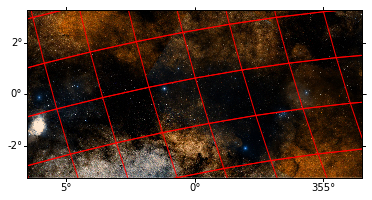

In [23]:
simple_painter.plot_mpl_hips_tile_grid()

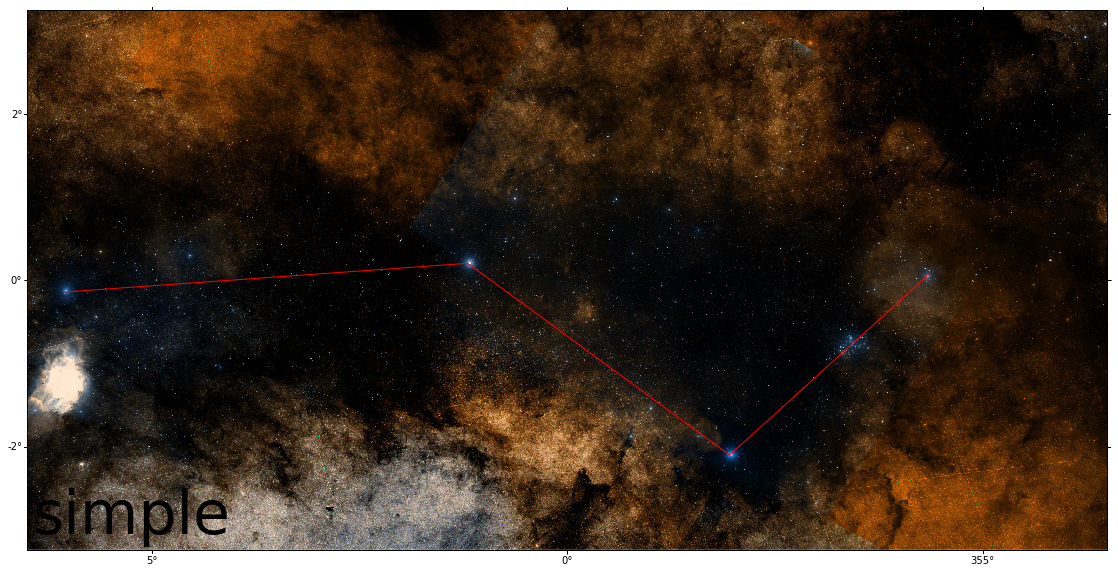

In [24]:
from astropy.visualization.wcsaxes import WCSAxes

fig = plt.figure(figsize=(15, 15))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=geometry.wcs)
fig.add_axes(ax)

text(10, 30,'simple', fontsize=60, )

plt.plot([70, 815, 1300, 1670], [477, 530, 175, 510], lw=1, color='red')
plt.imshow(simple_painter.image, cmap='gray', origin='lower',)


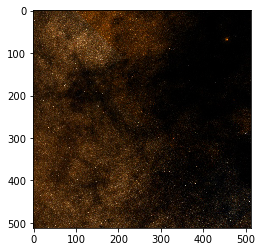

In [25]:
plt.imshow(simple_painter.draw_tiles[19].data)

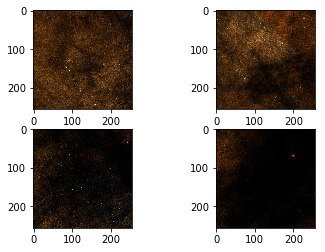

In [26]:
f, axarr = plt.subplots(2,2)
children = simple_painter.draw_tiles[19].children
axarr[0,0].imshow(children[0].data)
axarr[0,1].imshow(children[1].data)
axarr[1,0].imshow(children[2].data)
axarr[1,1].imshow(children[3].data)


In [27]:
# simple_painter._tiles = simple_painter.draw_tiles[19]
# simple_painter.draw_tiles()
# simple_painter.plot_mpl_hips_tile_grid()